In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./weatherconditions1.csv')
data.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51


In [3]:
#Show Key Statistics
data.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,10.347325,1003.235956
std,9.551546,0.195473,6.913571,4.192123,116.969906
min,-21.822222,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,8.339800,1011.900000
50%,12.000000,0.780000,9.965900,10.046400,1016.450000
75%,18.838889,0.890000,14.135800,14.812000,1021.090000
max,39.905556,1.000000,63.852600,16.100000,1046.380000


<AxesSubplot:>

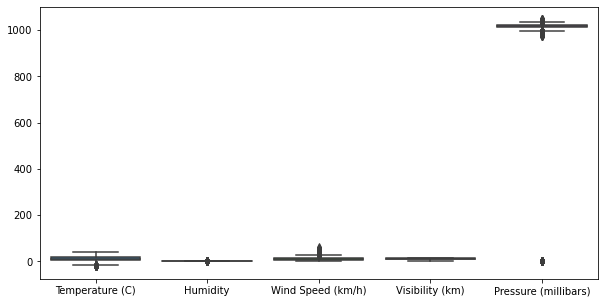

In [4]:
#Complete Boxplot Visualization
plt.figure(figsize =(10, 5))
sns.boxplot(data=data)

<AxesSubplot:>

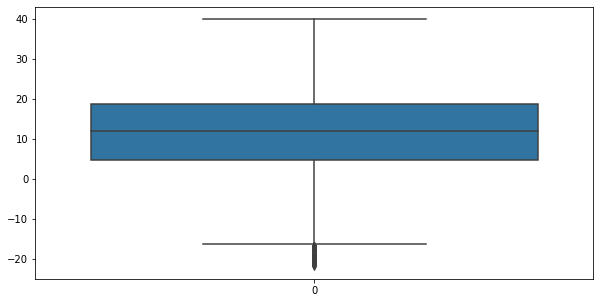

In [5]:
#Box plot Visualizaion for Temperature (C)
plt.figure(figsize =(10, 5))
sns.boxplot(data=data['Temperature (C)'])

<AxesSubplot:>

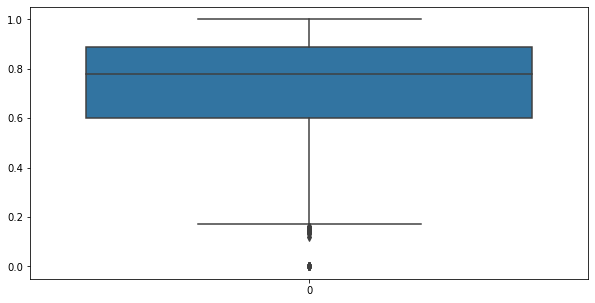

In [6]:
#Box plot Visualizaion for Humidity
plt.figure(figsize =(10, 5))
sns.boxplot(data=data.Humidity)

<AxesSubplot:>

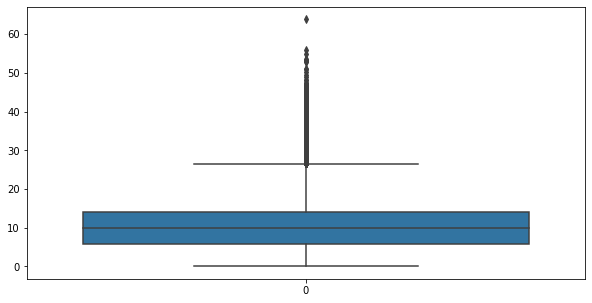

In [7]:
#Box plot Visualizaion for Wind Speed (km/h)
plt.figure(figsize =(10, 5))
sns.boxplot(data=data['Wind Speed (km/h)'])

<AxesSubplot:>

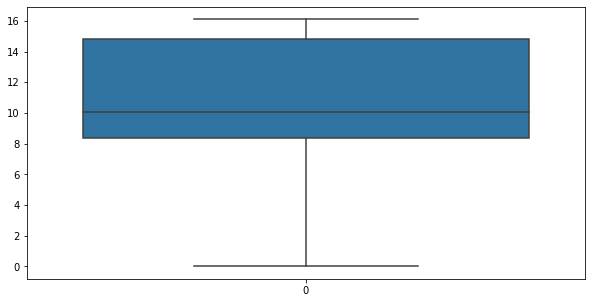

In [8]:
#Box plot Visualizaion for Visibility (km)
plt.figure(figsize =(10, 5))
sns.boxplot(data=data['Visibility (km)'])

<AxesSubplot:>

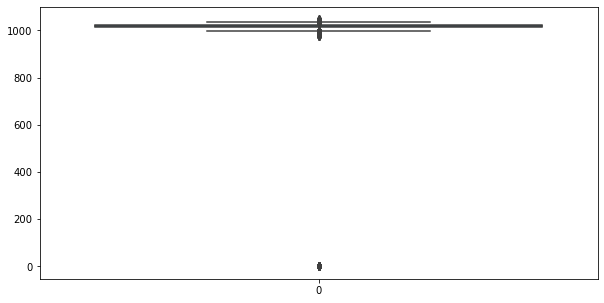

In [9]:
#Box plot Visualizaion for Pressure (millibars)
plt.figure(figsize =(10, 5))
sns.boxplot(data=data['Pressure (millibars)'])

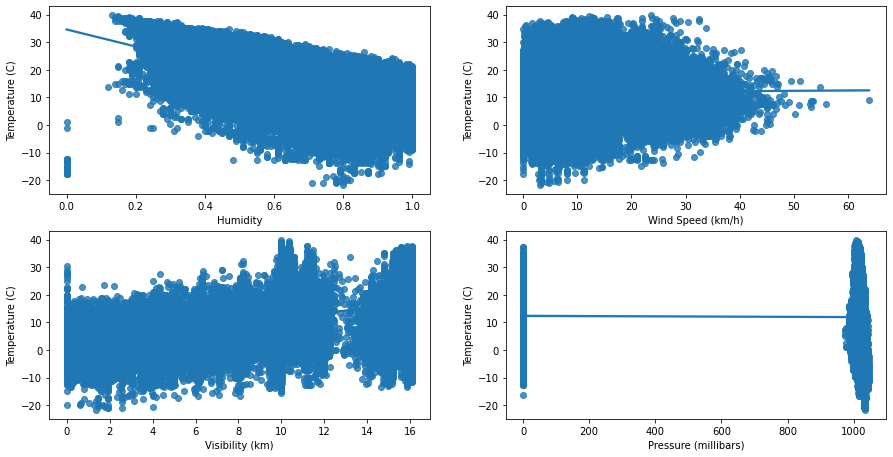

In [10]:
#Scatterplots - Temperature (C) vs. Independent Variables
plt.figure(figsize = (15, 20))

cnt = 1
for col in data.columns:
    if (col == 'Temperature (C)' ):
        continue
        
    plt.subplot(5, 2, cnt)
    lmgraph = sns.regplot(x = data [col], y = data['Temperature (C)'])
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('Temperature (C)')
    cnt += 1

In [11]:
#Define x and y variable
x = data.drop('Temperature (C)',axis=1).to_numpy()
y = data['Temperature (C)'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [12]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data.drop('Temperature (C)',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 11.90


                      Coefficients
Humidity                 -5.704935
Wind Speed (km/h)        -1.378157
Visibility (km)           1.796266
Pressure (millibars)     -0.189345

R2: 0.45
Adj_R2: 0.45

Mean Absolute Error: 5.68
Mean Squared Error: 49.69
Root Mean Squared Error: 7.05


In [13]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,22.200000,11.3,-10.9
1,4.811111,13.9,9.1
2,14.422222,4.1,-10.3
3,12.777778,4.9,-7.9
4,21.666667,13.7,-7.9
